<h1> K Means Function for Inputs with 2 features(x1,x2) </h1>

<h3> Import libraries </h3>

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
%matplotlib inline

<h3>Define the main function</h3>

In [78]:
def k_means(X=None, size=500, std_dev=1.5, iterations=4, centers=[[-1,1],[0,0]], colors_map=None, centroids_colors_map=None,
           marker='+'):
    """
    mahmoud.abdallah09@gmail.com
    https://www.linkedin.com/in/mahmoud-mohamed-42612320/
    
    This function with the assistance of the helper function 'plot_points' can perform k-means clustering.
    args:
        1- X: points to be clustered, input points must have 2 features. Default:semi-random points
        2- size: number of array points in case X is not given. Default:500
        3- std_dev: standard deviation for creating rendom points. Default:1.5
        4- iterations: how many iterations to update labels, colors, and centroids. Default:4
        5- centers: initial centroids array. Default:[[-2,2],[2,-2]]
        6- colors_map: Colors for different clusters. Default:['b', 'r', 'c', 'm', 'y', 'k', 'g']
        7- centroids_colors_map: Colors and markers for different centroids. Default:['b+', 'r+', 'c+', 'm+', 'y+', 'k+', 'g+']
        8- marker: shape of centroids Just use in case of not entering 'centroids_colors_map' manually. Default:'+'
    """
    
    # make random points if not given 
    if not X:
        X, _ = make_blobs(n_samples=size, n_features=2, cluster_std=std_dev)
    
    # in case X is given
    size = len(X)
       
    # plot points before clustering
    plot_points(X=X, figure_title='Scatter Plot before clustering')
    
    # give up to n colors (default=7) to different clusters, repeated if we have more than 7 clusters
    # b: blue, r: red, c: cyan, m: magenta, y: yellow, k: black , g: green
    if not colors_map:
        colors_map = ['b', 'r', 'c', 'm', 'y', 'k', 'g']
        clusters_colors = []
        for i in range(len(centers)):
            clusters_colors.append(colors_map[i%len(colors_map)])
    else:
        clusters_colors = colors_map
     
    if not centroids_colors_map:
        centroids_colors_map = ['b'+marker, 'r'+marker, 'c'+marker, 'm'+marker, 'y'+marker, 'k'+marker, 'g'+marker]
        centroids_colors = []
        for i in range(len(centers)):
            centroids_colors.append(centroids_colors_map[i%len(centroids_colors_map)])        
    else:
        centroids_colors = centroids_colors_map        
    
    # initiate clustering centroids values as entered centers
    centroids = centers.copy()    
    
    # plot points after initializing centroids
    plot_points(X=X, centroids=centroids, centroids_colors=centroids_colors, figure_title='k-means Initialization', 
                n_clusters=len(centers))
    
    # create an array to store points labels 
    X_labels = [0 for i in range(size)]
    # create an array to store points colors
    points_colors = [0 for i in range(size)]
    
    # update labels, colors, and centroids per each iteration
    for i in range(iterations):
        
        for p in range(size):
            # assign each datapoint to a cluster
            min_distance_to_centers = float('inf')
            for c in range(len(centroids)):
                distance_to_center = np.sqrt(np.square(X[p,0] - centroids[c][0]) + 
                                             np.square(X[p,1] - centroids[c][1]))
                if distance_to_center < min_distance_to_centers:
                    min_distance_to_centers = distance_to_center
                    X_labels[p] = c
    
            # assign point color according to the closest centroid
            points_colors[p] = clusters_colors[X_labels[p]]                
  
    

        title = 'Iteration {} - Cluster Assignment'.format(i + 1)
        plot_points(X, centroids=centroids, points_colors=points_colors, centroids_colors=centroids_colors, 
                    figure_title=title, n_clusters=len(clusters_colors))
        
        # updates the centroid of each cluster
        centroids = []
        for c in range(len(centers)):
            cluster_points = []
            for p in range(size):
                if X_labels[p] == c:
                    cluster_points.append(list(X[p])) 
                    
            cluster_points = np.array(cluster_points)                  
            centroids.append([np.mean(cluster_points[:,0]), np.mean(cluster_points[:,1])])

        title = 'Iteration {} - Centroid Update'.format(i + 1)
        plot_points(X, centroids=centroids, points_colors=points_colors, centroids_colors=centroids_colors, 
                    figure_title=title, n_clusters=len(clusters_colors))
    
    return X_labels , centroids

<h3>A helper function for plotting</h3>

In [79]:
def plot_points(X, centroids=None, centroids_colors='b', points_colors='g', figure_title=None, n_clusters=2):
    """
    A helper function to 'k_means' function to plot clustering.
    args:
        1- X:points to be clustered. Default:X from the main function
        2- centroids: centroids of clusters. Default:centroids from the main function.
        3- centroids_colors: colors of the centroids depending on the cluster. Default:'b'
        4- points_colors: colors of points depending on the cluster. Default:'g'
        5- figure_title: desired figure title. Default:None
        6- n_clusters: number of clusters. Default:2
        
    """    
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)

    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroids_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(X[:,0], X[:,1], s=100, c=points_colors)
    
    
    # define the ticks
    xticks = np.linspace(int(min(X[:,0])-1), int(max(X[:,0])+1), 15)
    yticks = np.linspace(int(min(X[:,1])-1), int(max(X[:,1])+1), 10)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=30)
    ax.set_ylabel('x2', fontsize=30)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

<h3>Testing</h3>

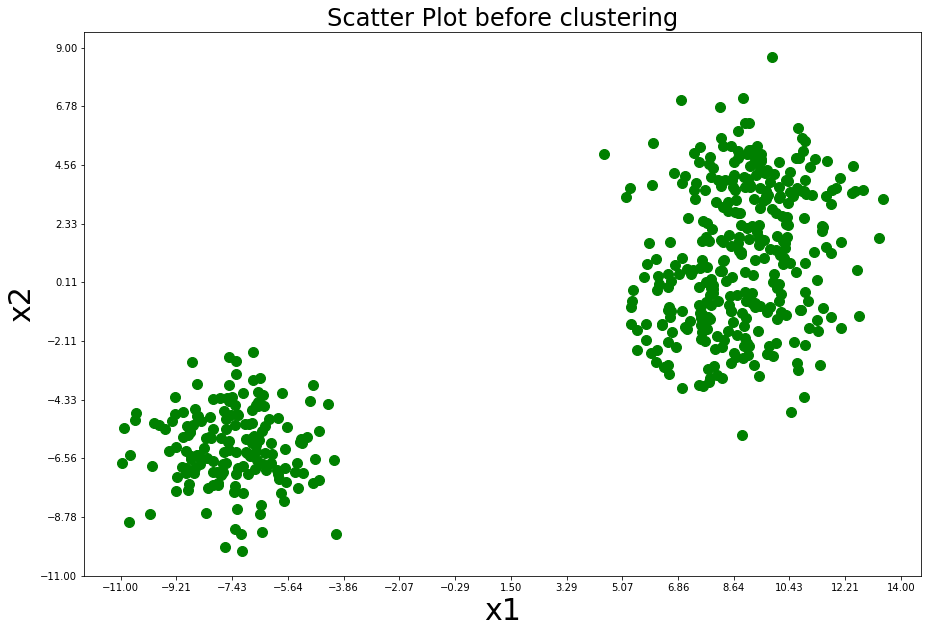

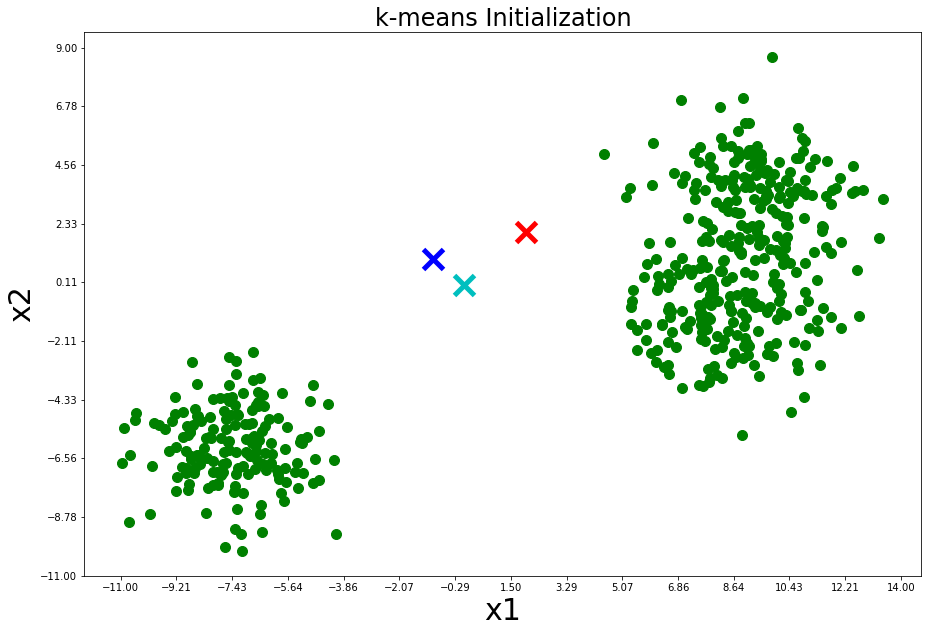

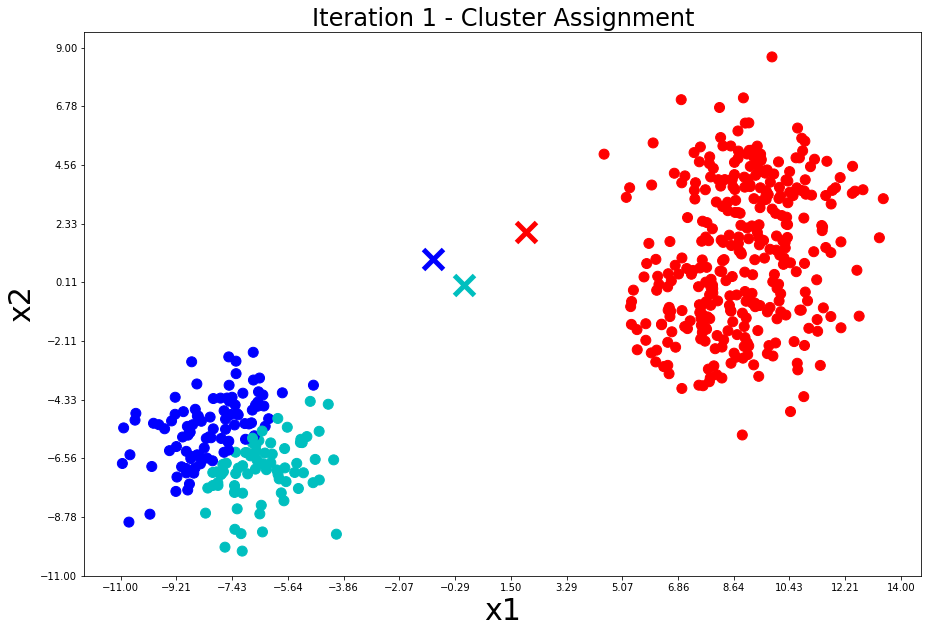

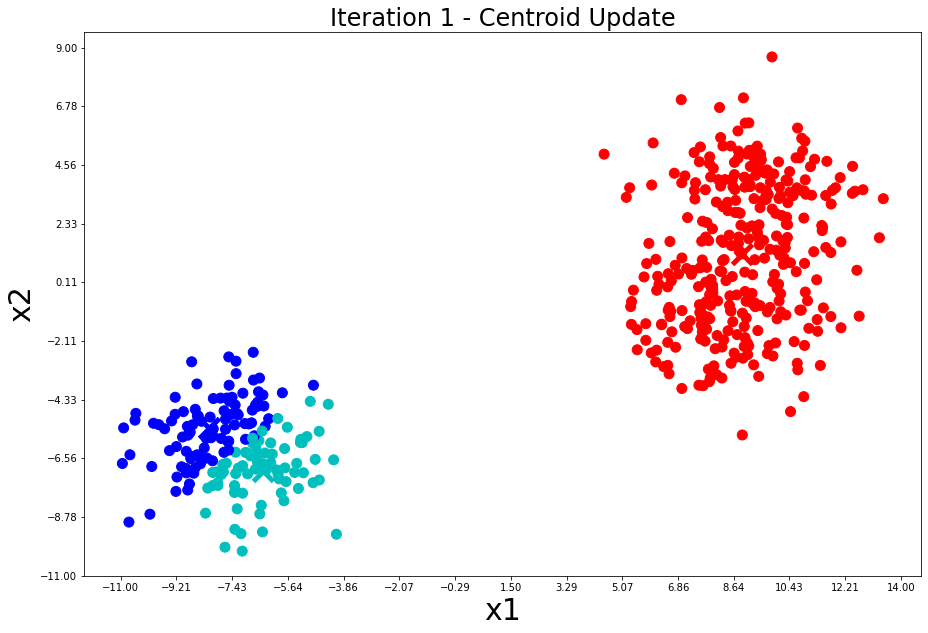

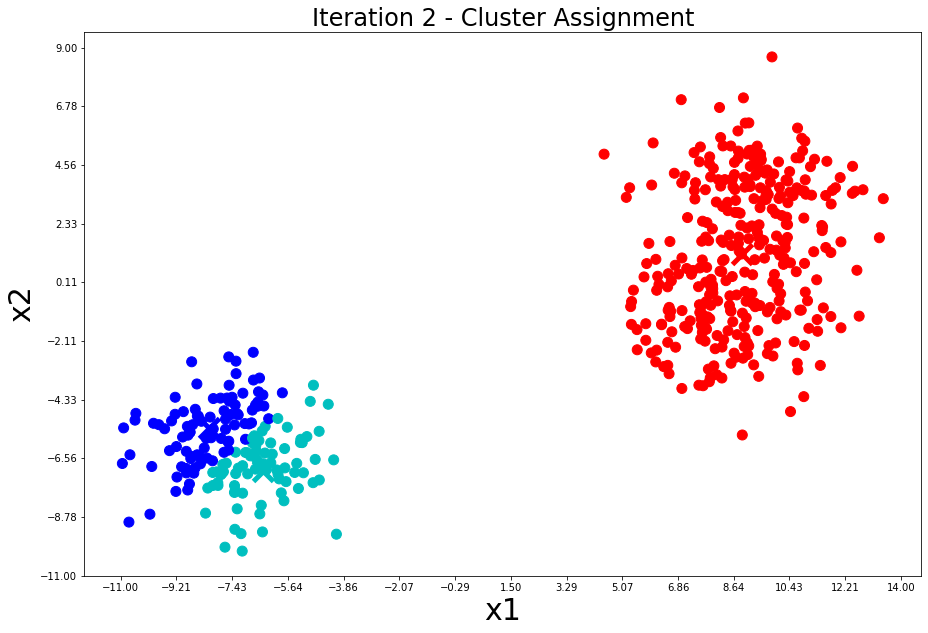

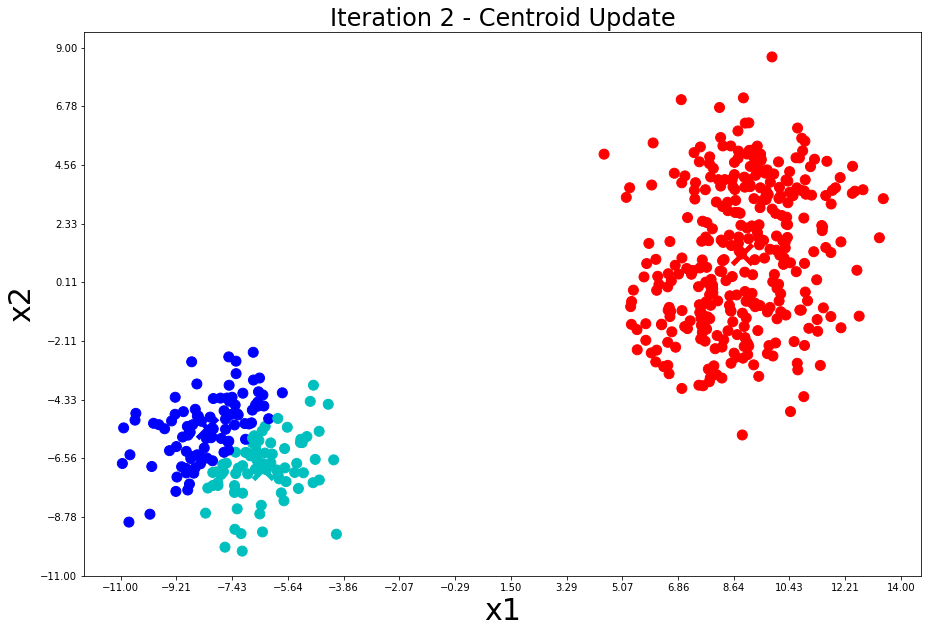

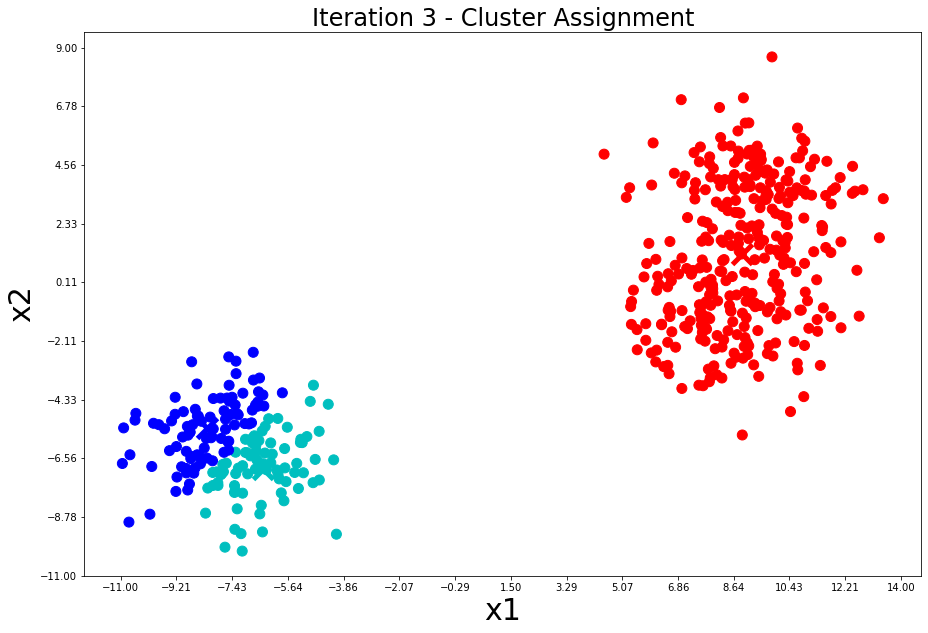

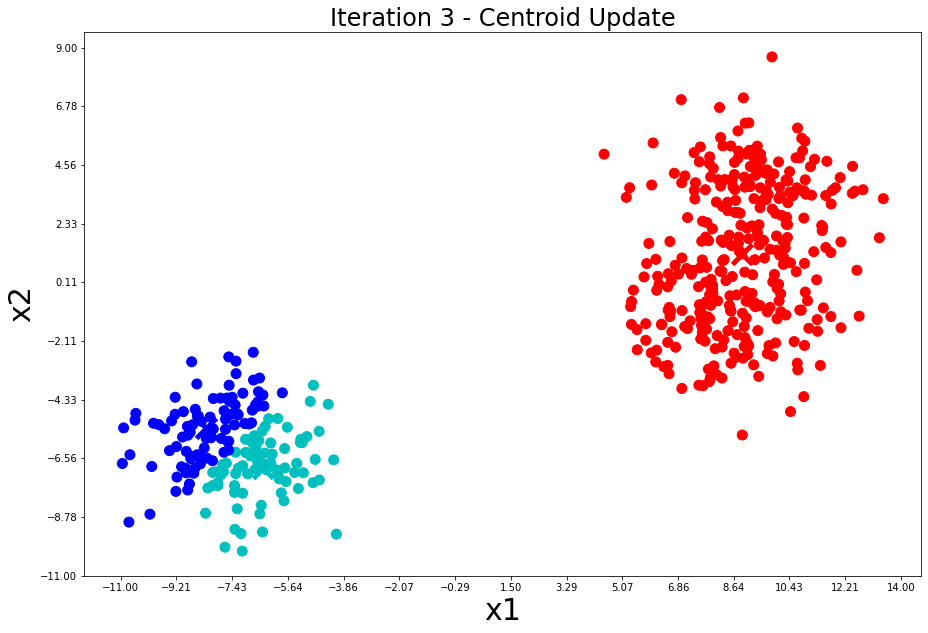

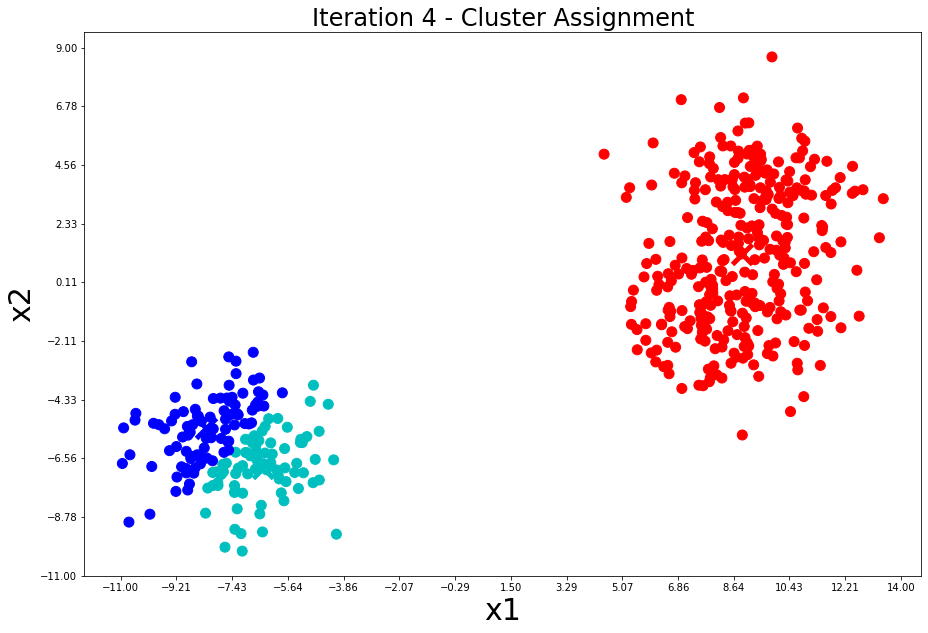

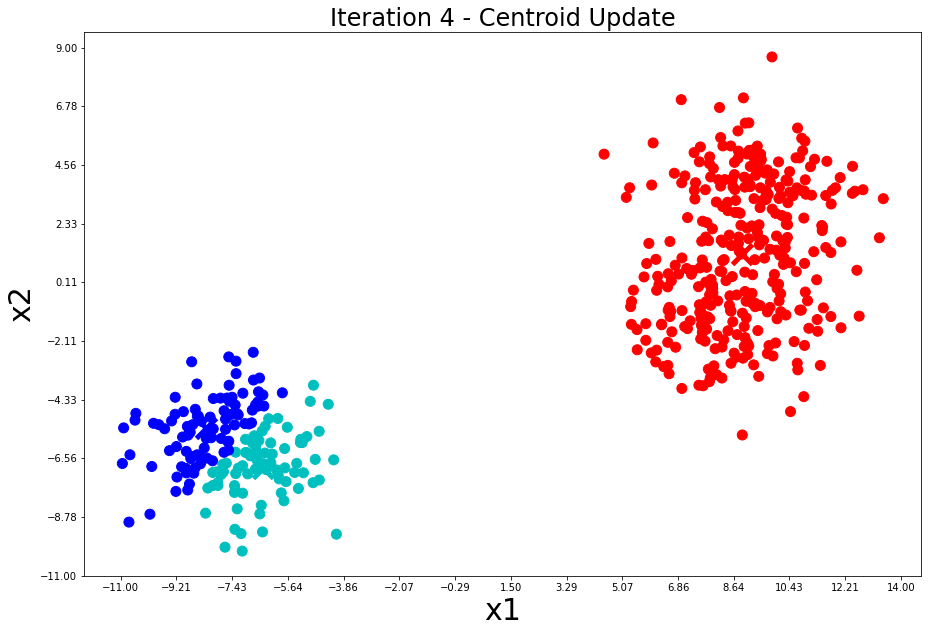

In [80]:
# you can try different parameters to ovverrite the defaults
# for example, now I chose 3 initial centers instead of 2 and change markker into 'X'
labels, centroids = k_means(centers = [[-1, 1], [2, 2], [0, 0]], marker='x')

In [81]:
labels

[0,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,


In [82]:
centroids

[[-8.280230817033273, -5.404620173684266],
 [8.899742173872935, 1.1844467926488613],
 [-6.435327110789875, -6.9153061159563505]]